# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

sns.set()

# Reading the datasets

Steps:
- Read the respective .csv file.
- Drop all redundant rows and columns
- Convert **Date** field from string to datetime format.
- Set **Date** as the index of the dataframe.

### Complete Dataset

In [2]:
data = pd.read_csv('web_scrapped_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop([0], axis=0)
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')
# data = data.drop(['index'], axis=1)

### Train Dataset

In [3]:
df = pd.read_csv('train.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop([0], axis=0)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
# df = df.drop(['index'], axis=1)

### Test Dataset

In [4]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop([0], axis=0)
df_test.Date = pd.to_datetime(df_test.Date)
df_test = df_test.set_index('Date')
# df_test = df_test.drop(['index'], axis=1)

# Auto Arima for SPX Market Prices
In this section we try and predict the SPX market prices using only the default **auto_arima** model.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [5]:
model_auto_arima = auto_arima(df.spx)

The summary statistics of the model.

In [6]:
print(model_auto_arima.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5353
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -21365.729
Date:                Thu, 02 Apr 2020   AIC                          42739.457
Time:                        18:02:27   BIC                          42765.798
Sample:                             0   HQIC                         42748.658
                               - 5353                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1086      0.068      1.606      0.108      -0.024       0.241
ar.L1          0.6151      0.062      9.970      0.000       0.494       0.736
ma.L1         -0.6812      0.056    -12.135      0.0

### Specify a start date and an end date for predictions.

In [7]:
start_date = '2014-07-15'
end_date = '2019-08-30'

### Use the model to predict the values for the dates defined.

In [8]:
pred = pd.DataFrame(model_auto_arima.predict(n_periods = len(df_test[start_date:end_date])),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

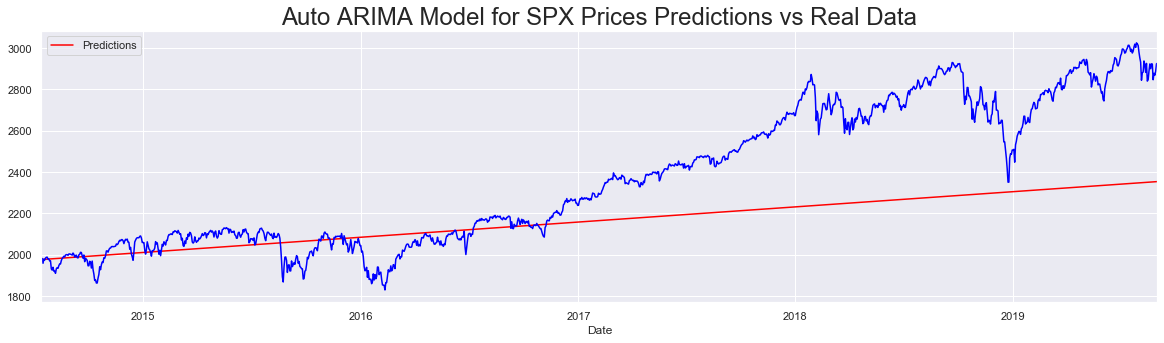

In [9]:
pred.plot(figsize = (20,5), color = "red")
df_test.spx[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMA Model for SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [10]:
mse = mean_squared_error(df_test.spx.values, pred.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 313.17065993237435


# Auto Arima for Normalized SPX Market Prices
In this section we try and predict the Normalized SPX market prices using only the default **auto_arima** model.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [11]:
model_auto_arima_norm = auto_arima(df.spx_norm)

The summary statistics of the model.

In [12]:
print(model_auto_arima_norm.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5353
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -13116.070
Date:                Thu, 02 Apr 2020   AIC                          26240.140
Time:                        18:02:37   BIC                          26266.481
Sample:                             0   HQIC                         26249.341
                               - 5353                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0232      0.014      1.604      0.109      -0.005       0.052
ar.L1          0.6148      0.062      9.962      0.000       0.494       0.736
ma.L1         -0.6809      0.056    -12.126      0.0

### Specify a start date and an end date for predictions.

In [13]:
start_date = '2014-07-15'
end_date = '2019-08-30'

### Use the model to predict the values for the dates defined.

In [14]:
pred_norm = pd.DataFrame(model_auto_arima_norm.predict(n_periods = len(df_test[start_date:end_date])),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

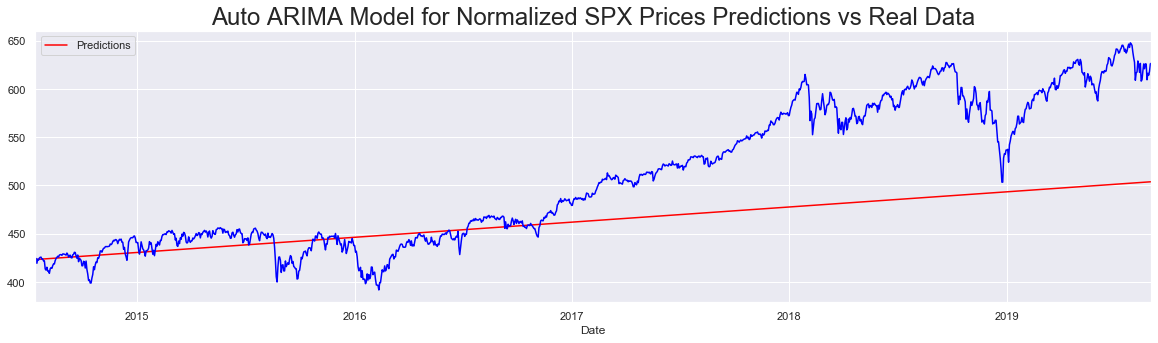

In [15]:
pred_norm.plot(figsize = (20,5), color = "red")
df_test.spx_norm[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMA Model for Normalized SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [16]:
mse = mean_squared_error(df_test.spx_norm.values, pred_norm.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 67.12584239596886


# Auto Arima for SPX Market Returns
In this section we try and predict the SPX market returns using only the default **auto_arima** model.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [17]:
model_auto_arima_ret = auto_arima(df.spx_ret[1:])

The summary statistics of the model.

In [18]:
print(model_auto_arima_ret.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5352
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -8478.210
Date:                Thu, 02 Apr 2020   AIC                          16964.420
Time:                        18:02:45   BIC                          16990.761
Sample:                             0   HQIC                         16973.620
                               - 5352                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0131      0.006      2.158      0.031       0.001       0.025
ar.L1          0.6151      0.051     12.046      0.000       0.515       0.715
ma.L1         -0.6849      0.046    -14.844      0.0

### Specify a start date and an end date for predictions.

In [19]:
start_date = '2014-07-15'
end_date = '2019-08-30'

### Use the model to predict the values for the dates defined.

In [20]:
pred_ret = pd.DataFrame(model_auto_arima_ret.predict(n_periods = len(df_test[start_date:end_date])),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

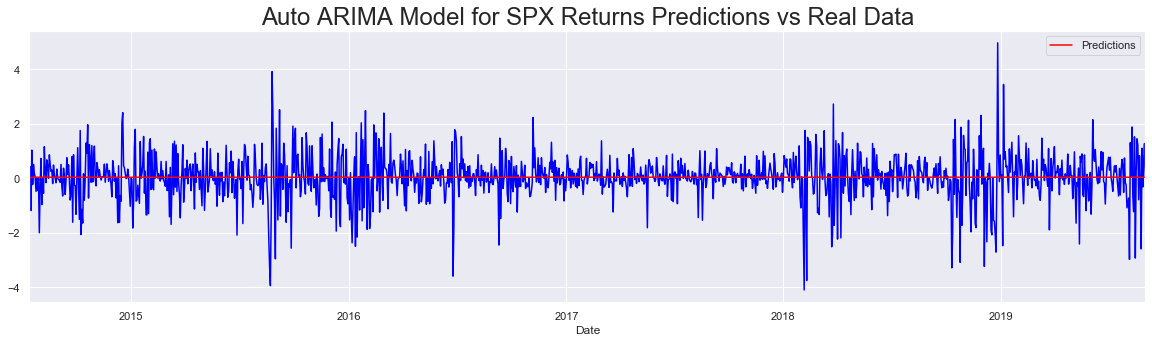

In [21]:
pred_ret.plot(figsize = (20,5), color = "red", zorder=2)
df_test.spx_ret[start_date:end_date].plot(color = "blue", zorder=1)
plt.title("Auto ARIMA Model for SPX Returns Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [22]:
mse = mean_squared_error(df_test.spx_ret.values, pred_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 0.838942523067638
